# Tutorial del módulo `semantic_spaces`

En este cuaderno se presentan de forma didáctica las funciones disponibles en `QSub.semantic_spaces`.
A través de ejemplos y visualizaciones aprenderás a obtener y manipular vectores semánticos basados en Gallito y BERT.

In [1]:
# Configuración de la clave de Gallito
_api_part1 = "code"
_api_part2 = "_here"
GALLITO_API_KEY = _api_part1 + _api_part2

In [1]:
import QSub.semantic_spaces as spaces
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## `get_word_vector_gallito`
Devuelve el vector de una palabra usando la API de Gallito. Es ideal para explorar espacios semánticos específicos.

In [3]:
vector = spaces.get_word_vector_gallito("china", GALLITO_API_KEY, "quantumlikespace_spanish")
vector[:10]

array([], dtype=float64)

## `get_lsa_corpus_gallito`
Carga un conjunto de términos de un archivo y devuelve un diccionario con sus vectores.

In [ ]:
corpus = spaces.get_lsa_corpus_gallito("notebooks/files/concepts.txt", GALLITO_API_KEY, "quantumlikespace_spanish")
list(corpus.keys())[:5]

### Visualización del corpus de Gallito
Representamos algunos vectores usando PCA para observar su distribución.

In [ ]:
pca = PCA(n_components=2)
words = list(corpus.keys())[:10]
X = pca.fit_transform([corpus[w] for w in words])
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1])
for i, w in enumerate(words):
    plt.text(X[i,0], X[i,1], w)
plt.title("Proyección PCA de vectores Gallito")
plt.show()

## `get_word_vector_bert`
Obtiene la representación BERT de una palabra. Permite elegir la capa del modelo.

In [2]:
bert_vec = spaces.get_word_vector_bert("hello")
bert_vec.shape

(768,)

## `get_bert_corpus`
Genera un corpus con los vectores BERT de las palabras más frecuentes en un idioma.

In [23]:
bert_corpus = spaces.get_bert_corpus(language="en", n_words=10)
bert_corpus

Procesando términos:   0%|          | 0/10 [00:00<?, ?it/s]

Procesando términos: 100%|██████████| 10/10 [00:00<00:00, 132.83it/s]


{'the': array([ 8.76863375e-02, -1.76188648e-01, -2.09953740e-01,  6.31181896e-02,
        -2.55918410e-02, -1.21447146e-01,  2.63190538e-01, -1.09655716e-01,
         1.71779290e-01, -3.79335791e-01, -2.16448829e-01,  6.73447177e-02,
         4.39429730e-02, -5.47216320e-03, -2.25511238e-01, -2.23707661e-01,
         1.89521406e-02,  3.30476277e-02, -7.32940063e-02,  1.37941971e-01,
         1.11532785e-01,  1.09657787e-01,  1.29789039e-01,  1.14445120e-01,
         7.36662671e-02,  3.77145499e-01, -2.88065791e-01, -1.84783116e-01,
        -4.08242464e-01,  1.08674139e-01, -1.39286324e-01, -2.76094913e-01,
        -8.68726149e-03,  3.95890355e-01, -2.26847589e-01, -1.46737635e-01,
        -8.59973580e-03, -9.98575613e-02, -3.78205895e-01, -1.41439721e-01,
        -6.50443509e-02, -8.45772848e-02,  1.33868873e-01, -9.67539772e-02,
        -9.94438231e-02,  6.15385361e-02, -3.35269451e-01,  7.57530555e-02,
        -1.05912082e-01,  3.17841917e-01, -2.72972643e-01,  2.29333416e-01,
     

### Visualización del corpus BERT
Al igual que con Gallito, proyectamos los vectores a 2D para analizarlos gráficamente.

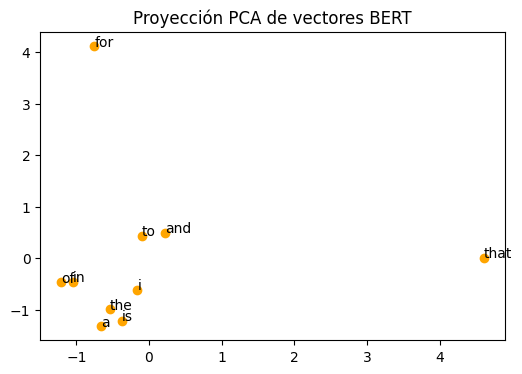

In [24]:
pca = PCA(n_components=2)
words_b = list(bert_corpus.keys())
X_b = pca.fit_transform([bert_corpus[w] for w in words_b])
plt.figure(figsize=(6,4))
plt.scatter(X_b[:,0], X_b[:,1], color="orange")
for i, w in enumerate(words_b):
    plt.text(X_b[i,0], X_b[i,1], w)
plt.title("Proyección PCA de vectores BERT")
plt.show()

## `word_cosine_similarity`
Calcula la similitud coseno entre dos vectores, una medida habitual para comparar representaciones semánticas.

In [22]:
w1 = spaces.get_word_vector_bert("china")
w2 = spaces.get_word_vector_bert("north korea")
spaces.cosine_similarity(w1, w2)

0.76105595